# Categorical Correlations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_original_data()

In [5]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [6]:
data_test = loan_approval_lib.load_data()['test']

In [7]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [8]:
data_categorical = data[
    ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
]

In [9]:
data_categorical

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
encoder = OrdinalEncoder()
encoder.fit(data_categorical.to_numpy())

data_categorical_encoded = encoder.transform(data_categorical.to_numpy())

In [12]:
encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [13]:
person_home_ownership_unique = data_categorical['person_home_ownership'].unique()
loan_intent_unique = data_categorical['loan_intent'].unique()
loan_grade_unique = data_categorical['loan_grade'].unique()
cb_person_default_on_file_unique = data_categorical['cb_person_default_on_file'].unique()

In [14]:
combinations = list(
    itertools.product(
        person_home_ownership_unique,
        loan_intent_unique,
        loan_grade_unique,
        cb_person_default_on_file_unique,
    )
)
combinations

[('RENT', 'PERSONAL', 'D', 'Y'),
 ('RENT', 'PERSONAL', 'D', 'N'),
 ('RENT', 'PERSONAL', 'B', 'Y'),
 ('RENT', 'PERSONAL', 'B', 'N'),
 ('RENT', 'PERSONAL', 'C', 'Y'),
 ('RENT', 'PERSONAL', 'C', 'N'),
 ('RENT', 'PERSONAL', 'A', 'Y'),
 ('RENT', 'PERSONAL', 'A', 'N'),
 ('RENT', 'PERSONAL', 'E', 'Y'),
 ('RENT', 'PERSONAL', 'E', 'N'),
 ('RENT', 'PERSONAL', 'F', 'Y'),
 ('RENT', 'PERSONAL', 'F', 'N'),
 ('RENT', 'PERSONAL', 'G', 'Y'),
 ('RENT', 'PERSONAL', 'G', 'N'),
 ('RENT', 'EDUCATION', 'D', 'Y'),
 ('RENT', 'EDUCATION', 'D', 'N'),
 ('RENT', 'EDUCATION', 'B', 'Y'),
 ('RENT', 'EDUCATION', 'B', 'N'),
 ('RENT', 'EDUCATION', 'C', 'Y'),
 ('RENT', 'EDUCATION', 'C', 'N'),
 ('RENT', 'EDUCATION', 'A', 'Y'),
 ('RENT', 'EDUCATION', 'A', 'N'),
 ('RENT', 'EDUCATION', 'E', 'Y'),
 ('RENT', 'EDUCATION', 'E', 'N'),
 ('RENT', 'EDUCATION', 'F', 'Y'),
 ('RENT', 'EDUCATION', 'F', 'N'),
 ('RENT', 'EDUCATION', 'G', 'Y'),
 ('RENT', 'EDUCATION', 'G', 'N'),
 ('RENT', 'MEDICAL', 'D', 'Y'),
 ('RENT', 'MEDICAL', 'D', 'N')

In [21]:
combinations_numeric = encoder.transform(combinations)

In [26]:
feature_names = data_categorical.columns
    
feature_unique_values = {
    feature: list(sorted(data_categorical[feature].unique())) for feature in feature_names
}

for key, value in feature_unique_values.items():
    print(f'{key}: {value}')

person_home_ownership: ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
loan_intent: ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
loan_grade: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cb_person_default_on_file: ['N', 'Y']


In [31]:
encoder_map = {}

for i, feature in enumerate(feature_names):

    for j in range(len(feature_unique_values[feature])):
        combination = [feature_unique_values[feature_][0] for feature_ in feature_names]
        combination[i] = feature_unique_values[feature][j]
        combination_numeric = encoder.transform([combination])

        if not feature in encoder_map:
            encoder_map[feature] = {}

        _in = combination[i]
        _out = combination_numeric[0][i]
        if not _in in encoder_map[feature]:
            encoder_map[feature][_in] = int(_out)

for feature in encoder_map.keys():
    print(f'feature: {feature}')
    print(encoder_map[feature])

feature: person_home_ownership
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
feature: loan_intent
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
feature: loan_grade
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
feature: cb_person_default_on_file
{'N': 0, 'Y': 1}


In [12]:
data_categorical_encoded

array([[3., 4., 3., 1.],
       [2., 1., 1., 0.],
       [0., 3., 2., 0.],
       ...,
       [3., 2., 1., 0.],
       [0., 4., 1., 0.],
       [3., 3., 1., 0.]], shape=(32581, 4))

In [15]:
df_data_categorical_encoded = pandas.DataFrame(data_categorical_encoded)
df_data_categorical_encoded.columns = data_categorical.columns

In [16]:
df_data_categorical_encoded

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,3.0,4.0,3.0,1.0
1,2.0,1.0,1.0,0.0
2,0.0,3.0,2.0,0.0
3,3.0,3.0,2.0,0.0
4,3.0,3.0,2.0,1.0
...,...,...,...,...
32576,0.0,4.0,2.0,0.0
32577,0.0,4.0,0.0,0.0
32578,3.0,2.0,1.0,0.0
32579,0.0,4.0,1.0,0.0


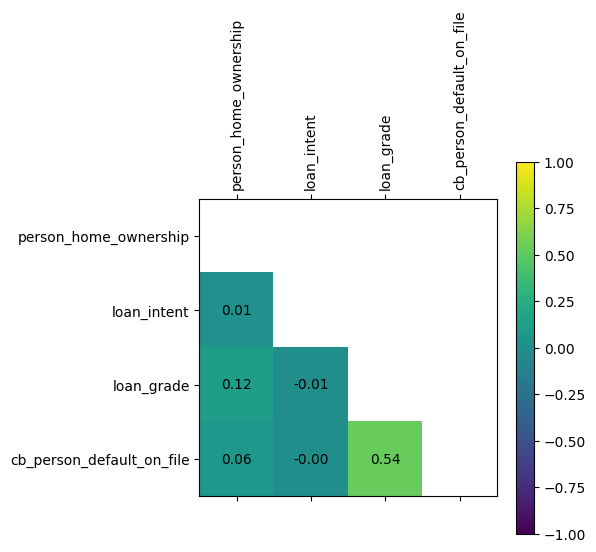

In [18]:
correlation = df_data_categorical_encoded.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.matshow(correlation, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.savefig('categorical_predictor_correlation.pdf', bbox_inches='tight')
None